### <center> **Impacto de las Condiciones Climáticas en el tiempo de  de parada en Boxes de F1** </center>


<center><img src="https://devra.ai/analyst/notebook/1604/image.jpg" alt="logo" style="width:700px; height:auto"></center>

### **Índice**

1. **Problema a Resolver**
   
2. **Hipótesis de Investigación**
   
3. **Fuentes de Datos**
   
4. **Limpieza de Datos**
   
5. **Análisis Exploratorio de Datos (EDA)**
   
6. **Visualizaciones**
   
7. **Conclusiones**




## **1. Problema a resolver**
Problema a resolver: **¿Las condiciones climáticas influyen en el tiempo de parada en boxes para el cambio de neumaticos?**



## **2. Hipótesis de Investigación**
"Pienso que las condiciones climáticas adversas, como temperaturas altas o humedad, aumentan el tiempo de parada en los boxes para el cambio de neumatico. Esto se debe a que las temperaturas extremas pueden afectar el rendimiento de los neumáticos y, por lo tanto, la complejidad de la gestión en las paradas."

## **3. Fuentes de Datos**

El conjunto de datos utilizado proviene de Kaggle y contiene información sobre las paradas en boxes de los pilotos de Fórmula 1 desde la temporada 2018 hasta la temporada 2024. Este conjunto de datos incluye telemetría detallada, como tiempos de vuelta, cambios de neumáticos, condiciones climáticas y comportamiento del conductor.

El archivo utilizado es el siguiente: **`f1_pitstops_2018_2024.csv`**. Este dataset incluye varias columnas que nos permitirán analizar y verificar si las condiciones climáticas (temperatura del aire, temperatura de la pista y humedad) influyen en el tiempo de parada en boxes y en el tipo de neumático utilizado. Esto podría confirmarse o refutarse a través de la relación entre las variables `Air_Temp_C`, `Track_Temp_C`, `Humidity_%`, `AvgPitStopTime`, y el tipo de neumático.

Puedes acceder al conjunto de datos en [Kaggle aquí](https://www.kaggle.com/datasets/akashrane2609/f1-stint-data-with-aggression-scores/data).

**Datos relevantes**:
- `Air_Temp_C`: La temperatura del aire.
- `Track_Temp_C`: La temperatura de la pista.
- `Humidity_%`: El porcentaje de humedad.
- `AvgPitStopTime`: El tiempo promedio de parada en boxes.


In [1]:
# Cargar el dataset nuevamente
import pandas as pd

# Ruta del archivo CSV
url = "f1_pitstops_2018_2024.csv"

# Cargar el dataset
df = pd.read_csv(url)

## **4. Limpieza de Datos**

Se eliminaron los valores faltantes en las columnas clave (temperaturas, humedad, tiempo de parada) y se aseguraron de que los datos estuvieran en el formato adecuado para el análisis.


In [3]:
# Limpieza de Datos

# 1. Eliminación de valores nulos
# Imputamos los valores nulos en las columnas clave con la media de la columna
df['Air_Temp_C'] = df['Air_Temp_C'].fillna(df['Air_Temp_C'].mean())
df['Track_Temp_C'] = df['Track_Temp_C'].fillna(df['Track_Temp_C'].mean())
df['Humidity_%'] = df['Humidity_%'].fillna(df['Humidity_%'].mean())
df['AvgPitStopTime'] = df['AvgPitStopTime'].fillna(df['AvgPitStopTime'].mean())

# 2. Conversión de tipos de datos
df['Air_Temp_C'] = pd.to_numeric(df['Air_Temp_C'], errors='coerce')
df['Track_Temp_C'] = pd.to_numeric(df['Track_Temp_C'], errors='coerce')
df['Humidity_%'] = pd.to_numeric(df['Humidity_%'], errors='coerce')
df['AvgPitStopTime'] = pd.to_numeric(df['AvgPitStopTime'], errors='coerce')

# 3. Filtrado de datos (Eliminación de filas con valores NaN)
df = df.dropna()  # Elimina todas las filas con cualquier valor NaN

# Verificamos los primeros registros del dataset
df.head()

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Tire Usage Aggression,Fast Lap Attempts,Position Changes,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,0.017241,44.76882,0.000000,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,0.017241,44.73482,0.043478,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821
4,2018,1,Albert Park Grand Prix Circuit,Kimi RÃƒÂ¤ikkÃƒÂ¶nen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,0.017241,45.13482,0.086957,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421
6,2018,1,Albert Park Grand Prix Circuit,Daniel Ricciardo,Red Bull,58,4,1,21.440,Australian Grand Prix,...,0.017241,45.11582,0.130435,6.820062,RIC,1.0,SUPERSOFT,25.0,26.0,21.44
8,2018,1,Albert Park Grand Prix Circuit,Fernando Alonso,McLaren,58,5,1,22.573,Australian Grand Prix,...,0.017241,43.98282,0.173913,6.654571,ALO,1.0,ULTRASOFT,25.0,26.0,22.573


## **5. Análisis Exploratorio de Datos (EDA) y Visualización de Graficas**

Se investigó la relación entre las condiciones climáticas (temperatura y humedad) y los tiempos de parada en boxes. Se calculó la correlación entre estas variables para ver si existe una relación significativa.


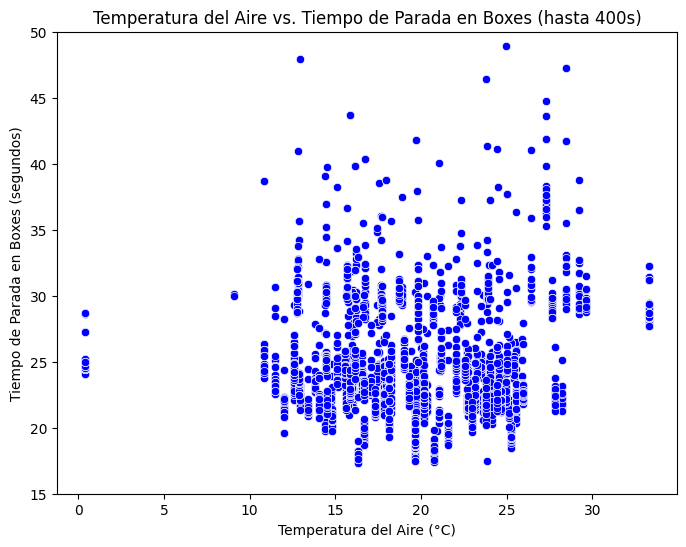

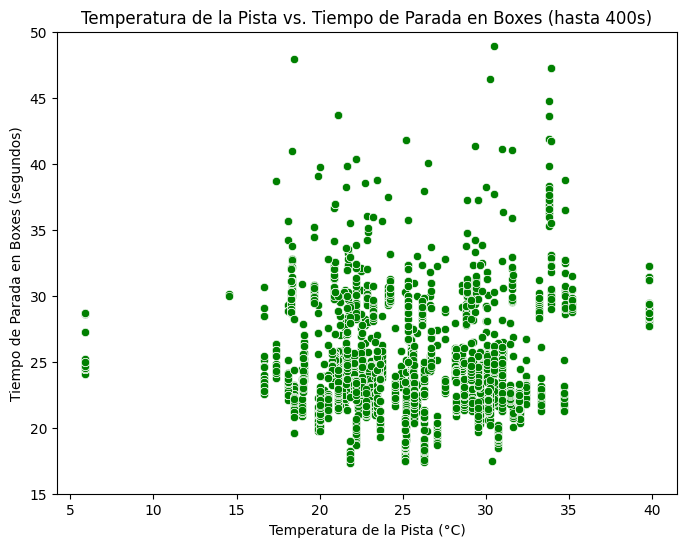

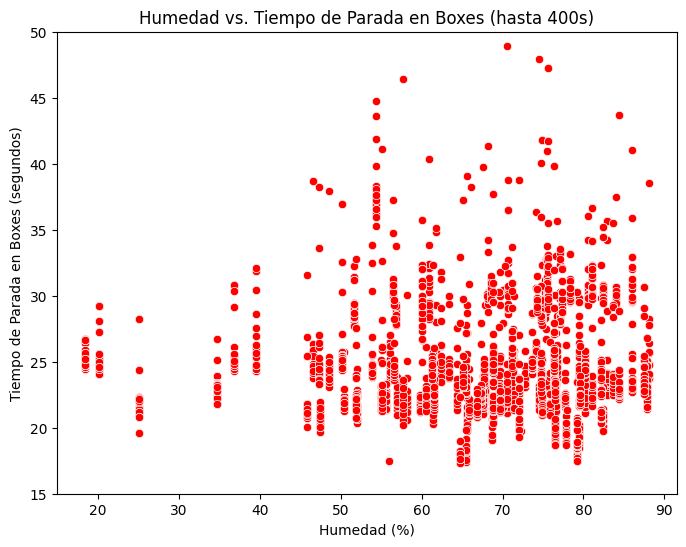

Matriz de correlación entre las variables:
                Air_Temp_C  Track_Temp_C  Humidity_%  AvgPitStopTime
Air_Temp_C        1.000000      0.996160   -0.162243       -0.089216
Track_Temp_C      0.996160      1.000000   -0.235551       -0.096091
Humidity_%       -0.162243     -0.235551    1.000000        0.133305
AvgPitStopTime   -0.089216     -0.096091    0.133305        1.000000


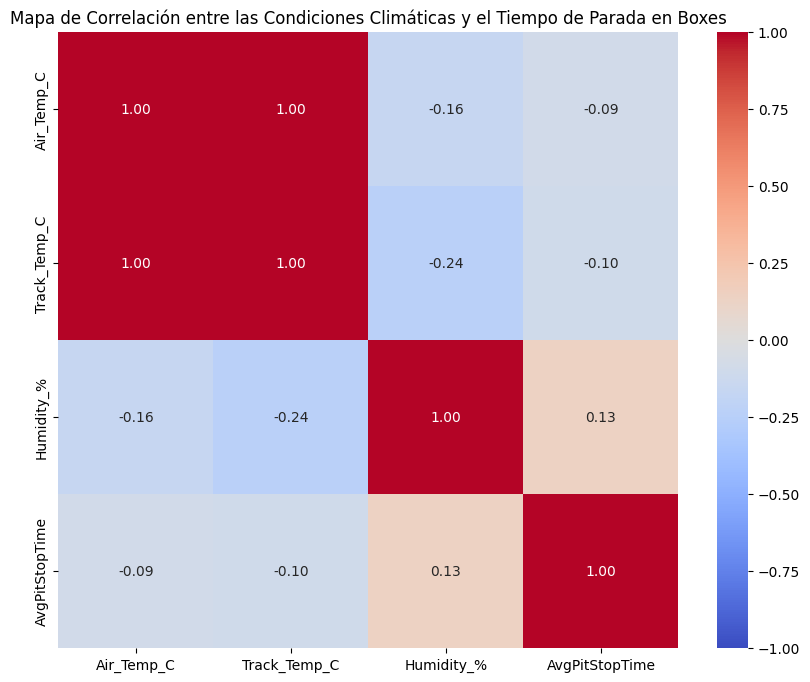

In [6]:
# Cargar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Análisis de la relación entre temperatura del aire y tiempo de parada en boxes
temp_aire_y_parada = df[['Air_Temp_C', 'AvgPitStopTime']]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=temp_aire_y_parada, x='Air_Temp_C', y='AvgPitStopTime', color='blue')
plt.ylim(15, 50)  # Limitar eje Y a 400 segundos
plt.title('Temperatura del Aire vs. Tiempo de Parada en Boxes (hasta 400s)')
plt.xlabel('Temperatura del Aire (°C)')
plt.ylabel('Tiempo de Parada en Boxes (segundos)')
plt.show()

# 2. Análisis de la relación entre temperatura de la pista y tiempo de parada en boxes
temp_pista_y_parada = df[['Track_Temp_C', 'AvgPitStopTime']]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=temp_pista_y_parada, x='Track_Temp_C', y='AvgPitStopTime', color='green')
plt.ylim(15, 50)  # Limitar eje Y a 400 segundos
plt.title('Temperatura de la Pista vs. Tiempo de Parada en Boxes (hasta 400s)')
plt.xlabel('Temperatura de la Pista (°C)')
plt.ylabel('Tiempo de Parada en Boxes (segundos)')
plt.show()

# 3. Análisis de la relación entre humedad y tiempo de parada en boxes
humedad_y_parada = df[['Humidity_%', 'AvgPitStopTime']]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=humedad_y_parada, x='Humidity_%', y='AvgPitStopTime', color='red')
plt.ylim(15, 50)  # Limitar eje Y a 400 segundos
plt.title('Humedad vs. Tiempo de Parada en Boxes (hasta 400s)')
plt.xlabel('Humedad (%)')
plt.ylabel('Tiempo de Parada en Boxes (segundos)')
plt.show()

# 4. Cálculo de la correlación entre temperatura del aire, temperatura de la pista, humedad y tiempo de parada
correlacion = df[['Air_Temp_C', 'Track_Temp_C', 'Humidity_%', 'AvgPitStopTime']].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación entre las variables:")
print(correlacion)

# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Correlación entre las Condiciones Climáticas y el Tiempo de Parada en Boxes')
plt.show()






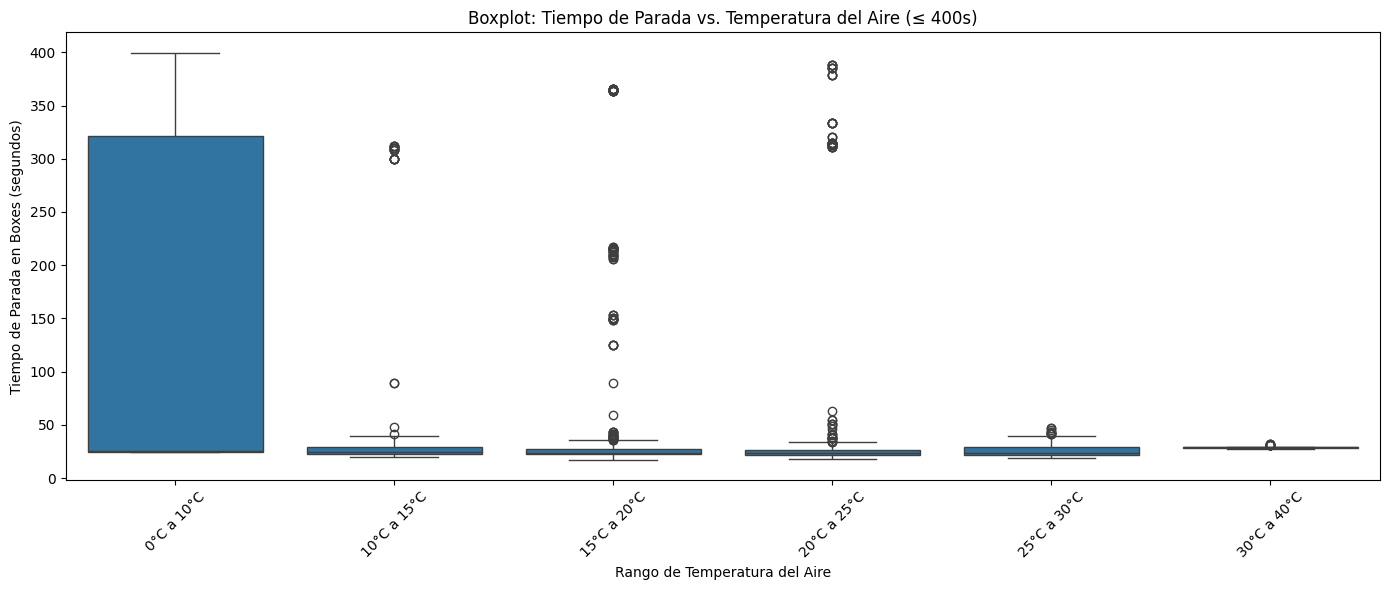

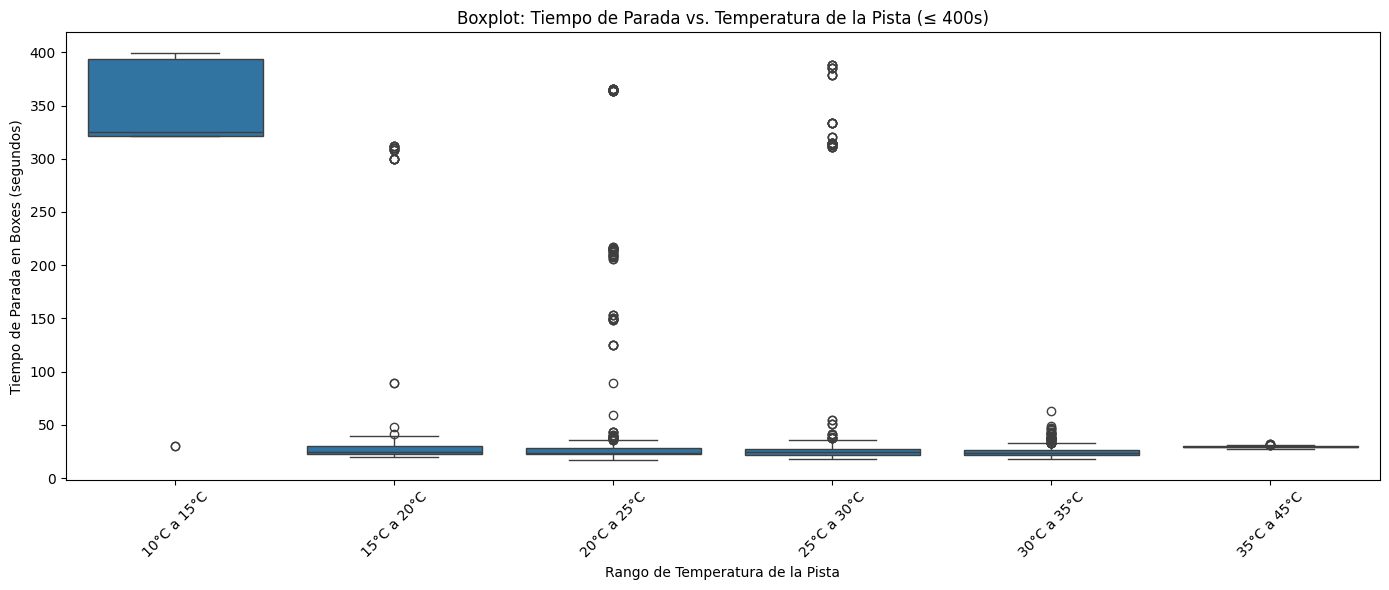

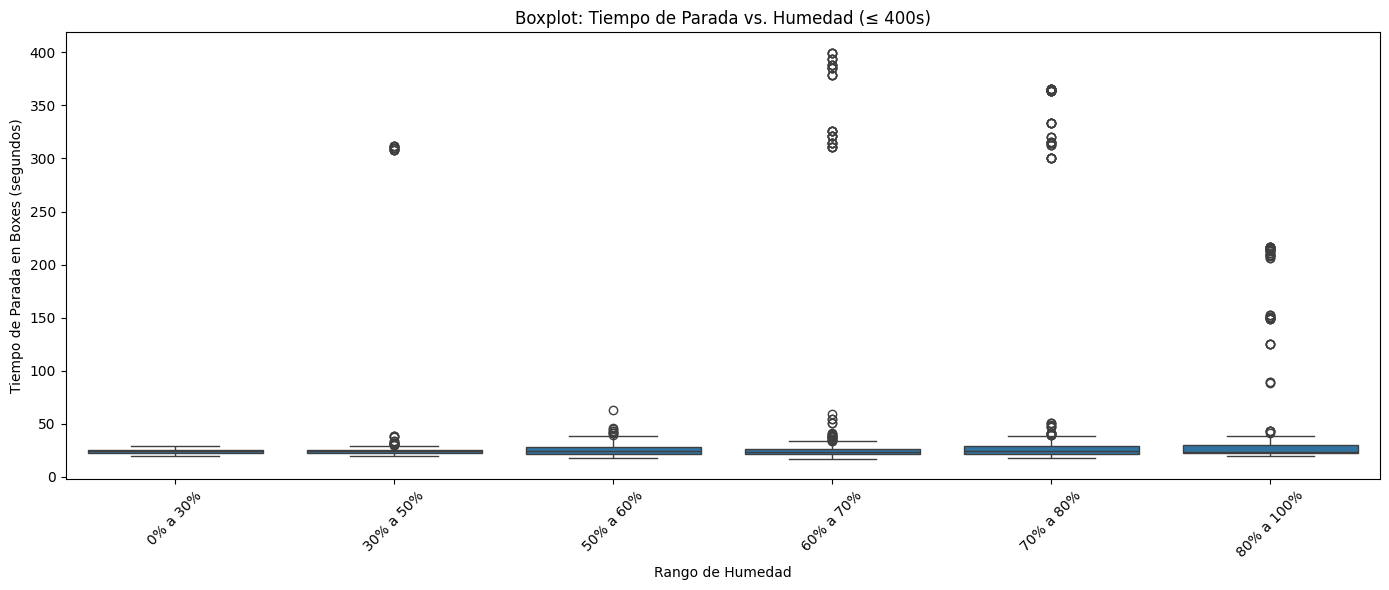

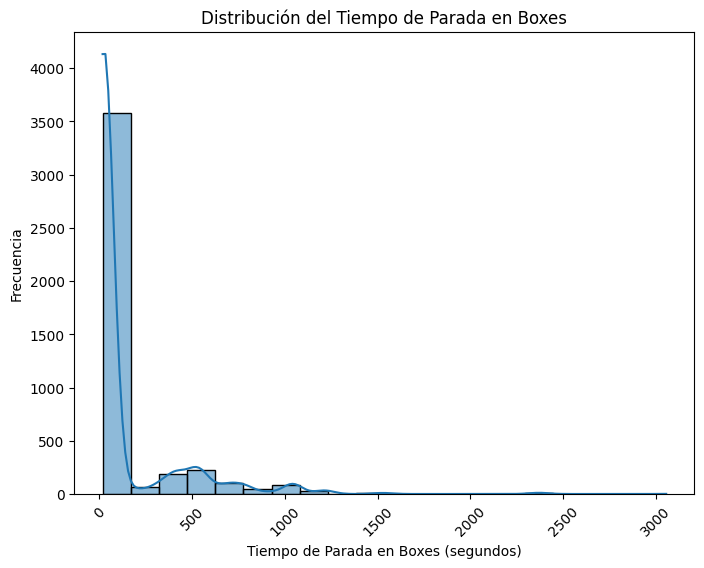

In [27]:
# Filtrar solo paradas ≤ 400s
df_filtrado = df[df['AvgPitStopTime'] <= 400].copy()

# Definir configuraciones de bins y etiquetas
agrupaciones = {
    'Air_Temp_C': { # 1. Boxplot: Temperatura del Aire vs. Tiempo de Parada
        'col_nueva': 'Air_Temp_Group',
        'bins': [0,10,15,20,25,30,40],
        'labels': ["0°C a 10°C", "10°C a 15°C", "15°C a 20°C", "20°C a 25°C", "25°C a 30°C", "30°C a 40°C"],
        'titulo': 'Temperatura del Aire'
    },
    'Track_Temp_C': { # 2. Boxplot: Temperatura de la Pista vs. Tiempo de Parada
        'col_nueva': 'Track_Temp_Group',
        'bins': [10,15,20,25,30,35,45],
        'labels': ["10°C a 15°C", "15°C a 20°C", "20°C a 25°C", "25°C a 30°C", "30°C a 35°C", "35°C a 45°C"],
        'titulo': 'Temperatura de la Pista'
    },
    'Humidity_%': { # 3. Boxplot: Humedad vs. Tiempo de Parada
        'col_nueva': 'Humidity_Group',
        'bins': [0,30,50,60,70,80,100],
        'labels': ["0% a 30%", "30% a 50%", "50% a 60%", "60% a 70%", "70% a 80%", "80% a 100%"],
        'titulo': 'Humedad'
    }
}

# Generar cada boxplot con etiquetas personalizadas
for columna, config in agrupaciones.items():
    df_filtrado[config['col_nueva']] = pd.cut(
        df_filtrado[columna],
        bins=config['bins'],
        labels=config['labels'],
        include_lowest=True
    )

    plt.figure(figsize=(14, 6))
    sns.boxplot(x=config['col_nueva'], y='AvgPitStopTime', data=df_filtrado)
    plt.title(f"Boxplot: Tiempo de Parada vs. {config['titulo']} (≤ 400s)")
    plt.xlabel(f"Rango de {config['titulo']}")
    plt.ylabel("Tiempo de Parada en Boxes (segundos)")
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
    


# 4. Histograma de la distribución del Tiempo de Parada en Boxes
plt.figure(figsize=(8, 6))
sns.histplot(df['AvgPitStopTime'], kde=True, bins=20)
plt.title('Distribución del Tiempo de Parada en Boxes')
plt.xlabel('Tiempo de Parada en Boxes (segundos)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, fontsize=10)
plt.show()


## **7. Conclusiones**
Tras analizar los datos, encontramos que las condiciones climáticas especialmente la temperatura y la humedad **pueden influir** en el tiempo de parada en boxes, aunque no de forma lineal ni directa.

Las temperaturas extremas y los altos niveles de humedad **no aumentan siempre el tiempo promedio**, pero sí generan **más variabilidad** en las paradas. Es decir, bajo estas condiciones el tiempo puede ser menos predecible. Esto concuerda con nuestra hipótesis inicial: **el clima afecta la estrategia de paradas**, ya sea por el desgaste de neumáticos o por precauciones adicionales del equipo.

Aunque la correlación matemática fue baja, los gráficos de dispersión y la distribución de los datos mostraron comportamientos interesantes que justifican seguir investigando este tema.

En resumen, **considerar el clima en tiempo real podría ayudar a los equipos a tomar decisiones más eficientes**, reducir el riesgo y optimizar los resultados en carrera.
